In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
%%time
col_names=["frame", "x", "y", "obj","size","seq","tbd1","tbd2","tbd3","filename","start","path_time","delta_time","tbd4"]
df = pd.read_csv('data/fixed.csv' ,parse_dates=['start'], usecols = ['frame','x','y','obj','size','seq','filename','start','path_time','delta_time'],names = col_names)
df.head(10)


Wall time: 23.1 s


In [4]:
%%time
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997978 entries, 0 to 2997977
Data columns (total 10 columns):
frame         int64
x             int64
y             int64
obj           int64
size          int64
seq           int64
filename      object
start         datetime64[ns]
path_time     object
delta_time    object
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 554.6 MB
Wall time: 1.03 s


In [5]:
%%time
df.describe()


Wall time: 2.37 s


,frame,x,y,obj,size,seq
count,2.997978e+06,2.997978e+06,2.997978e+06,2.997978e+06,2.997978e+06,2.997978e+06
mean,8.289597e+03,2.730162e+02,1.480890e+02,5.053649e+01,4.675812e+07,1.158957e+02
std,5.189151e+03,1.609973e+02,7.650775e+01,8.449937e+01,3.391170e+07,1.502103e+02
min,0.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,3.620000e+02,0.000000e+00
25%,3.712000e+03,1.440000e+02,9.500000e+01,1.200000e+01,1.419073e+07,1.600000e+01
50%,8.119000e+03,2.690000e+02,1.340000e+02,2.800000e+01,4.510348e+07,5.900000e+01
75%,1.263600e+04,4.020000e+02,2.050000e+02,5.100000e+01,5.399656e+07,1.620000e+02
max,1.847600e+04,6.370000e+02,3.570000e+02,6.430000e+02,1.265195e+08,1.977000e+03


In [6]:
df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997978 entries, 0 to 2997977
Data columns (total 10 columns):
frame         int64
x             int64
y             int64
obj           int64
size          int64
seq           int64
filename      object
start         datetime64[ns]
path_time     object
delta_time    object
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 554.6 MB


In [8]:
gl_obj = df.select_dtypes(include=['object']).copy()
gl_obj.describe()

dow = gl_obj.filename
print(dow.head())

dow_cat = dow.astype('category')
print(dow_cat.head())

0     14-16\20170817012709_100.h264.txt
1     14-16\20170817012709_100.h264.txt
2     14-16\20170817012709_100.h264.txt
3     14-16\20170817012709_100.h264.txt
4     14-16\20170817012709_100.h264.txt
Name: filename, dtype: object
0     14-16\20170817012709_100.h264.txt
1     14-16\20170817012709_100.h264.txt
2     14-16\20170817012709_100.h264.txt
3     14-16\20170817012709_100.h264.txt
4     14-16\20170817012709_100.h264.txt
Name: filename, dtype: category
Categories (602, object): [-16\20170820143029_100.h264.txt, .h264.txt, 0.h264.txt, 0003141_100.h264.txt, ..., v10014-16\20170824043058_100.h264.txt, v10014-16\20170824083405_100.h264.txt, v10014-16\20170824122055_100.h264.txt, v10014-16\20170822142906_100.h264.txt]


In [9]:
dow_cat.head().cat.codes


# We're going to be calculating memory usage a lot,
# so we'll create a function to save us some time!

def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)



print(mem_usage(dow))
print(mem_usage(dow_cat))

180.03 MB
5.77 MB


In [10]:
optimized_gl = df.copy()
date = optimized_gl.frame
print(mem_usage(date))
date.head()


22.87 MB


0    0
1    0
2    0
3    0
4    0
Name: frame, dtype: int64

In [11]:
%%time
df.head(10)

Wall time: 0 ns


,frame,x,y,obj,size,seq,filename,start,path_time,delta_time
0,0,14,329,0,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:27:09,0:00:00
1,0,4,291,1,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:27:09,0:00:00
2,0,629,7,2,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:27:09,0:00:00
3,0,253,4,3,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:27:09,0:00:00
4,0,185,4,4,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:27:09,0:00:00
5,1700,5,102,5,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:28:17,0:01:08
6,1701,6,102,5,362,1,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:28:17,0:01:08
7,1702,6,102,5,362,2,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:28:17,0:01:08
8,1703,7,102,5,362,3,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:28:17,0:01:08
9,1704,9,102,5,362,4,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:28:17,0:01:08


In [12]:
df.groupby(df.start).size()

start
2017-08-17 01:27:09      7311
2017-08-17 01:42:25      9902
2017-08-17 01:57:38    120780
2017-08-17 02:12:50      5034
2017-08-17 02:28:03      4961
2017-08-17 02:43:14      4042
2017-08-17 02:58:24      9170
2017-08-17 03:13:37      6694
2017-08-17 03:28:49      6448
2017-08-17 03:44:03      2371
2017-08-17 03:59:13      2392
2017-08-17 04:14:23      2465
2017-08-17 04:29:40      2730
2017-08-17 04:45:12      2562
2017-08-17 05:00:24       627
2017-08-17 05:15:36      2908
2017-08-17 05:30:48      1728
2017-08-17 05:46:01      1619
2017-08-17 06:01:15       330
2017-08-17 06:16:30       712
2017-08-17 06:31:49       503
2017-08-17 06:47:02         5
2017-08-17 07:02:14         9
2017-08-17 07:17:25         3
2017-08-17 07:32:37       859
2017-08-17 07:48:15       808
2017-08-17 08:03:27         5
2017-08-17 08:18:51         5
2017-08-17 08:34:05         4
2017-08-17 08:49:19         3
                        ...  
2017-08-24 08:18:53      5519
2017-08-24 08:33:08     26717
2017

In [13]:
cols_types = dict({   
    'delta_time': 'object',
    'filename': 'category',
    'frame': 'uint16',
    'obj': 'uint16',
    'path_time': 'object',
    'seq': 'uint16',
    'size': 'uint32',
    'x': 'uint16',
    'y': 'uint16'})



In [14]:
%%time 
useful_cols = ["frame", "x", "y", "obj","size","seq","filename","start","path_time","delta_time"]
read_and_optimized = pd.read_csv('data/odd.csv',names=col_names,usecols=useful_cols,dtype=cols_types,parse_dates=['start'],infer_datetime_format=True)

print(mem_usage(read_and_optimized))
read_and_optimized.head()

283.10 MB
Wall time: 26.1 s


In [15]:
%%time
read_and_optimized.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997979 entries, 0 to 2997978
Data columns (total 10 columns):
frame         uint16
x             uint16
y             uint16
obj           uint16
size          uint32
seq           uint16
filename      category
start         datetime64[ns]
path_time     object
delta_time    object
dtypes: category(1), datetime64[ns](1), object(2), uint16(5), uint32(1)
memory usage: 283.1 MB
Wall time: 684 ms


In [5]:
import pickle

In [6]:
%%time
df.to_pickle('data/paths.pkl.xz')


Wall time: 1min 41s


In [9]:

df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997978 entries, 0 to 2997977
Data columns (total 10 columns):
frame         int64
x             int64
y             int64
obj           int64
size          int64
seq           int64
filename      object
start         datetime64[ns]
path_time     object
delta_time    object
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 554.6 MB


In [7]:
%%time
pd.read_pickle('data/paths.pkl.xz')

Wall time: 2.78 s


,frame,x,y,obj,size,seq,filename,start,path_time,delta_time
0,0,14,329,0,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:27:09,0:00:00
1,0,4,291,1,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:27:09,0:00:00
2,0,629,7,2,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:27:09,0:00:00
3,0,253,4,3,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:27:09,0:00:00
4,0,185,4,4,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:27:09,0:00:00
5,1700,5,102,5,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:28:17,0:01:08
6,1701,6,102,5,362,1,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:28:17,0:01:08
7,1702,6,102,5,362,2,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:28:17,0:01:08
8,1703,7,102,5,362,3,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:28:17,0:01:08
9,1704,9,102,5,362,4,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09,01:28:17,0:01:08


In [8]:
df.info(memory_usage='deep')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997978 entries, 0 to 2997977
Data columns (total 10 columns):
frame         int64
x             int64
y             int64
obj           int64
size          int64
seq           int64
filename      object
start         datetime64[ns]
path_time     object
delta_time    object
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 554.6 MB


In [9]:
df['sample_time'] = df.start
df['sample_time'] += pd.to_timedelta(df['delta_time'])
df = df.drop('start', 1)


In [10]:
df = df.drop('delta_time', 1)

In [11]:
df.drop('path_time', 1)

,frame,x,y,obj,size,seq,filename,sample_time
0,0,14,329,0,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09
1,0,4,291,1,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09
2,0,629,7,2,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09
3,0,253,4,3,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09
4,0,185,4,4,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:27:09
5,1700,5,102,5,362,0,14-16\20170817012709_100.h264.txt,2017-08-17 01:28:17
6,1701,6,102,5,362,1,14-16\20170817012709_100.h264.txt,2017-08-17 01:28:17
7,1702,6,102,5,362,2,14-16\20170817012709_100.h264.txt,2017-08-17 01:28:17
8,1703,7,102,5,362,3,14-16\20170817012709_100.h264.txt,2017-08-17 01:28:17
9,1704,9,102,5,362,4,14-16\20170817012709_100.h264.txt,2017-08-17 01:28:17


In [14]:
time = "2017-08-24 15:32:21"
time

'2017-08-24 15:32:21'

In [98]:

time_s = pd.to_datetime("14:31:09").time()
time_e = pd.to_datetime("15:31:09").time()
objs = df.groupby(["filename","obj"]).agg({'sample_time': ['min', 'max']})
objs.head(10)
minimon = objs.sample_time['min'].dt.time 
maximom = objs.sample_time['max'].dt.time
# objs.sample_time.between(time_s,time_e)

# objs[objs.sample_time['min'].dt.time ]
items = objs[(min.between(time_s, time_e)) | ((min < time_s) & (max > time_s))]


AttributeError: 'builtin_function_or_method' object has no attribute 'between'

In [159]:
objs = df.groupby(["filename", "obj"]).agg({'sample_time': ['min', 'max']})
begin_time = pd.to_datetime("14:31:09").time()
end_time = pd.to_datetime("15:31:09").time()
min = objs.sample_time['min'].dt.time  # objs[('sample_time','min')]
max = objs.sample_time['max'].dt.time  # objs[('sample_time','max')]

items = objs[(min.between(begin_time, end_time)) | ((min < begin_time) & (max > begin_time))]
items.drop('sample_time', 1)

Empty DataFrame
Columns: []
Index: [( -16\20170820143029_100.h264.txt, 22), ( 14-16\20170817142504_100.h264.txt, 28), ( 14-16\20170817142504_100.h264.txt, 29), ( 14-16\20170817142504_100.h264.txt, 30), ( 14-16\20170817142504_100.h264.txt, 31), ( 14-16\20170817142504_100.h264.txt, 32), ( 14-16\20170817142504_100.h264.txt, 33), ( 14-16\20170817142504_100.h264.txt, 34), ( 14-16\20170817142504_100.h264.txt, 35), ( 14-16\20170817142504_100.h264.txt, 36), ( 14-16\20170817142504_100.h264.txt, 37), ( 14-16\20170817142504_100.h264.txt, 38), ( 14-16\20170817142504_100.h264.txt, 39), ( 14-16\20170817142504_100.h264.txt, 40), ( 14-16\20170817142504_100.h264.txt, 41), ( 14-16\20170817142504_100.h264.txt, 42), ( 14-16\20170817142504_100.h264.txt, 43), ( 14-16\20170817142504_100.h264.txt, 44), ( 14-16\20170817142504_100.h264.txt, 45), ( 14-16\20170817142504_100.h264.txt, 46), ( 14-16\20170817142504_100.h264.txt, 47), ( 14-16\20170817142504_100.h264.txt, 48), ( 14-16\20170817142504_100.h264.txt, 49), ( 14-16\20170817144014_100.h264.txt, 0), ( 14-16\20170817144014_100.h264.txt, 1), ( 14-16\20170817144014_100.h264.txt, 2), ( 14-16\20170817144014_100.h264.txt, 3), ( 14-16\20170817144014_100.h264.txt, 4), ( 14-16\20170817144014_100.h264.txt, 5), ( 14-16\20170817144014_100.h264.txt, 6), ( 14-16\20170817144014_100.h264.txt, 7), ( 14-16\20170817144014_100.h264.txt, 8), ( 14-16\20170817144014_100.h264.txt, 9), ( 14-16\20170817144014_100.h264.txt, 10), ( 14-16\20170817144014_100.h264.txt, 11), ( 14-16\20170817144014_100.h264.txt, 12), ( 14-16\20170817144014_100.h264.txt, 13), ( 14-16\20170817144014_100.h264.txt, 14), ( 14-16\20170817144014_100.h264.txt, 15), ( 14-16\20170817144014_100.h264.txt, 16), ( 14-16\20170817144014_100.h264.txt, 17), ( 14-16\20170817144014_100.h264.txt, 18), ( 14-16\20170817144014_100.h264.txt, 19), ( 14-16\20170817144014_100.h264.txt, 20), ( 14-16\20170817144014_100.h264.txt, 21), ( 14-16\20170817144014_100.h264.txt, 22), ( 14-16\20170817144014_100.h264.txt, 23), ( 14-16\20170817144014_100.h264.txt, 24), ( 14-16\20170817144014_100.h264.txt, 25), ( 14-16\20170817144014_100.h264.txt, 26), ( 14-16\20170817144014_100.h264.txt, 27), ( 14-16\20170817144014_100.h264.txt, 28), ( 14-16\20170817145525_100.h264.txt, 0), ( 14-16\20170817145525_100.h264.txt, 1), ( 14-16\20170817145525_100.h264.txt, 2), ( 14-16\20170817145525_100.h264.txt, 3), ( 14-16\20170817145525_100.h264.txt, 4), ( 14-16\20170817145525_100.h264.txt, 5), ( 14-16\20170817145525_100.h264.txt, 6), ( 14-16\20170817145525_100.h264.txt, 7), ( 14-16\20170817145525_100.h264.txt, 8), ( 14-16\20170817145525_100.h264.txt, 9), ( 14-16\20170817145525_100.h264.txt, 10), ( 14-16\20170817145525_100.h264.txt, 11), ( 14-16\20170817145525_100.h264.txt, 12), ( 14-16\20170817145525_100.h264.txt, 13), ( 14-16\20170817145525_100.h264.txt, 14), ( 14-16\20170817145525_100.h264.txt, 15), ( 14-16\20170817145525_100.h264.txt, 16), ( 14-16\20170817145525_100.h264.txt, 17), ( 14-16\20170817145525_100.h264.txt, 18), ( 14-16\20170817145525_100.h264.txt, 19), ( 14-16\20170817145525_100.h264.txt, 20), ( 14-16\20170817145525_100.h264.txt, 21), ( 14-16\20170817145525_100.h264.txt, 22), ( 14-16\20170817145525_100.h264.txt, 23), ( 14-16\20170817145525_100.h264.txt, 24), ( 14-16\20170817145525_100.h264.txt, 25), ( 14-16\20170817145525_100.h264.txt, 26), ( 14-16\20170817145525_100.h264.txt, 27), ( 14-16\20170817145525_100.h264.txt, 28), ( 14-16\20170817145525_100.h264.txt, 29), ( 14-16\20170817145525_100.h264.txt, 30), ( 14-16\20170817145525_100.h264.txt, 31), ( 14-16\20170817145525_100.h264.txt, 32), ( 14-16\20170817145525_100.h264.txt, 33), ( 14-16\20170817145525_100.h264.txt, 34), ( 14-16\20170817145525_100.h264.txt, 35), ( 14-16\20170817151037_100.h264.txt, 0), ( 14-16\20170817151037_100.h264.txt, 1), ( 14-16\20170817151037_100.h264.txt, 2), ( 14-16\20170817151037_100.h264.txt, 3), ( 14-16\20170817151037_100.h264.txt, 4), ( 14-16\20170817151037_100.h264.txt, 5), ( 14-16\20170817151037_100.h264.txt, 6), ( 1

In [78]:
import datetime
d = datetime.date(2017, 8, 23)
df[df.time.dt.date == d]

AttributeError: 'DataFrame' object has no attribute 'time'

Populating the interactive namespace from numpy and matplotlib


filename                                             obj
 0041952_100.h264.txt                                10       5
                                                     11      19
                                                     13       5
 0095531_100.h264.txt                                80      12
                                                     81      11
 0114208_100.h264.txt                                20       4
 0153127_100.h264.txt                                20      11
 0180348_100.h264.txt                                51      17
 14-16\20170817012709_100.h264.txt                   7       26
                                                     17       3
                                                     22       2
                                                     26      16
                                                     29       7
                                                     32       3
                                               

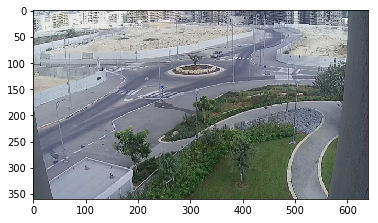

In [151]:

%pylab inline
img = imread('data/paths0.png')
imshow(img)


num_square=(2,4)
num_of_squares=(10,10)
y=img.shape[0]
x=img.shape[1]
x_size=x//num_of_squares[0]
y_size=y//num_of_squares[1]
p1=(x_size*num_square[0],y_size*(num_square[1]))
p2=(x_size*(num_square[0]+1),y_size*(num_square[1]+1))

df1 = df[(df.x.between(p1[0], p2[0])) & (df.y.between(p1[1], p2[1]))]

df1.groupby(["filename", "obj"]).size()

Populating the interactive namespace from numpy and matplotlib


(360, 640)

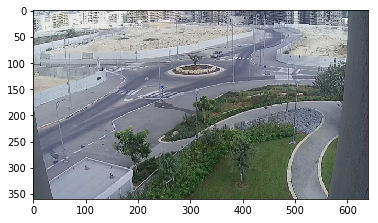

In [148]:

%pylab inline
im = imread('data/paths0.png')
imshow(im)
im_size_y = im.shape[0]
im_size_x=im.shape[1]

x_size = im_size_x // 10
y_size = im_size_y // 10

p1=(im_size_y,im_size_x)
p1
p2=(x_size*(10+1),y_size*(10+1))
p2


df1 = df[(df.x.between(p1[0], p2[0])) & (df.y.between(p1[1], p2[1]))]

df1.groupby(["filename", "obj"]).size()


p1




In [146]:
df1 = df[(df.x.between(100, 200)) & (df.y.between(200, 250))]

+df1.groupby(["filename", "obj"]).size()

filename                            obj
 0114208_100.h264.txt               20       6
 0153127_100.h264.txt               20       7
 0180348_100.h264.txt               55       3
 14-16\20170817012709_100.h264.txt  9        1
                                    17       6
                                    18      12
                                    22       9
                                    26       3
                                    29       2
                                    32       5
                                    33     120
                                    47       4
                                    48       1
 14-16\20170817014225_100.h264.txt  7        1
                                    15       6
                                    16       7
                                    17     102
                                    44       8
                                    51      55
                                    52      43
 14-16\2017081701573